## 연속형 확률변수
이산형 확률변수와 연속형 확률변수의 주된 차이는 확률변수가 취할 수 있는 값이 이산적인가 연속적인가이다. 연속형 확률변수의 경우 계산 과정에 적분이 포함된다. 적분은 SciPy의 integral 모듈을 사용하여 구현함


In [88]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%precision 3

'%.3f'

## 미적분 관계

- 총효용과 한계효용간의 관계를 미적분으로 설명할 수 있다.
- 총효용곡선의 특정 x에 대한 y값은 한계효용곡선의 하방면적과 같고 한계효용곡선의 특정 x에 대한 y값은 총효용곡선의 x에서의 기울기와 같다.

<img src = './image/미적분관계1.jpg' STYLE='width 100px;'>
<img src = './image/미적분관계3.jpg' STYLE='width 100px;'>


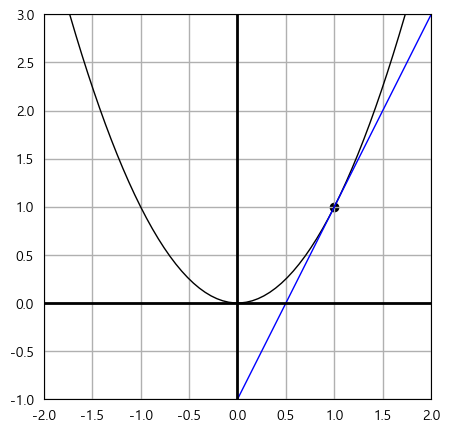

In [89]:
def f(x):
    return(x**2)
def g(x):
    return(2*x -1)

# x가 1일때의 접선의 방정식 2x -1, 기울기는 1
x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(5,5))
plt.scatter([1],[1],c='k')
plt.plot(x, f(x), 'b-', lw=1, c='k')
plt.plot(x, g(x), 'b-', lw=1, c='b')
plt.plot([x.min(), x.max()], [0, 0], lw=2, c='k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw=2, c='k')
plt.ylim(-1, 3)
plt.xlim(-2, 2)
plt.grid(lw=1)
# plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')
plt.show()


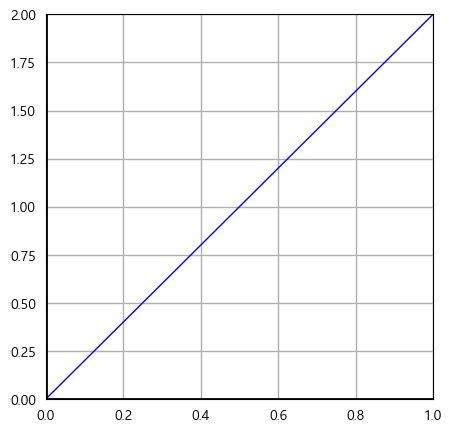

In [90]:
def g(x):
    return(2*x) 

x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(5,5))
plt.plot(x, g(x), 'b-', lw=1, c='b')
plt.plot([x.min(), x.max()], [0, 0], lw=2, c='k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw=2, c='k')
plt.ylim(0, 2)
plt.xlim(0, 1)
plt.grid(lw=1)
# plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')
plt.show()


### 1차원 연속형 확률변수

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%precision 3
%matplotlib inline

#### 확률밀도함수

In [92]:
# 취할수 있는 값의 구간에 대해 하한과 상한을 X_RANGE로 정의
x_range = np.array([0,1])

In [93]:
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2*x
    else:
        return 0

In [94]:
# x_range와 f의 세트가 확률분포 임 - 이 확률분포에 의해 확률변수 X의 움직임 결정 됨 .
# X는 x_range와 f를 요소로 하는 리스트로 구현
X = [x_range, f]

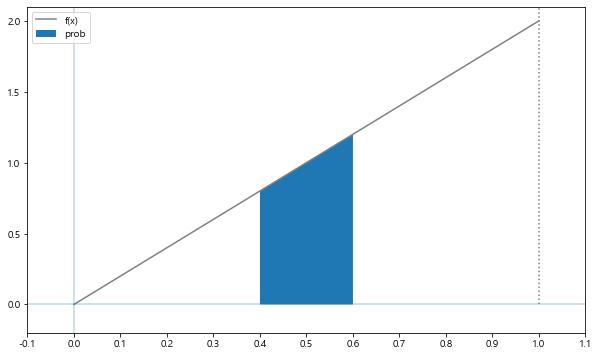

In [95]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)' , color='gray')
ax.hlines(0, -0.2, 1.2, alpha= 0.3)
ax.vlines(0, -0.2, 2.2, alpha= 0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4부터 0.6까지 x좌표를 준비
xs = np.linspace(0.4, 0.6, 100)
# xs의 범위로 f(x)와 x축으로 둘러싸인 영역에 색을 적용
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()


In [96]:
# 첫 번째 인수는 피적분함수, 두 번째 인수와 세 번째 인수는 적분 범위
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

In [97]:
from scipy.optimize import minimize_scalar
# f(x)의 최소값이 0이 나오는지 확인
res = minimize_scalar(f)
# 합수의 최소값은 fun이라는 인스턴스 변수에
res.fun

0

In [98]:
# 적분계산으로 확인(무한대적용)= np.inf  
integrate.quad(f, -np.inf, np.inf)[0]

1.000

#### 누적분포함수

In [99]:
# 분포함수 구현
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [100]:
F(0.6) - F(0.4)

0.200

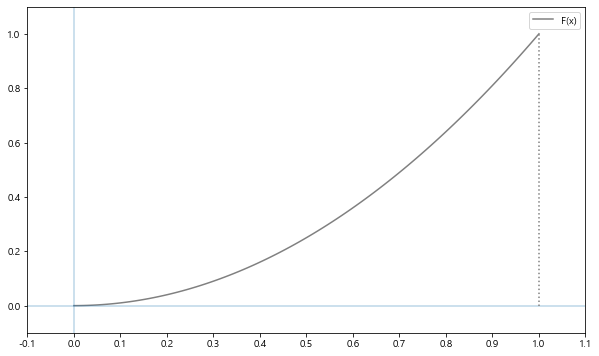

In [101]:
#분포 함수 F(x) 그리기 (분포함수는 반드시 단조증가함수가 됨)
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)' , color='gray')
ax.hlines(0, -0.1, 1.1, alpha= 0.3)
ax.vlines(0, -0.1, 1.1, alpha= 0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

#### 확률변수의 변환

In [102]:
y_range = [3, 5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y - 3) / 2
    else:
        return 0
    
def G(y):
    return integrate.quad(g, -np.inf, y)[0]

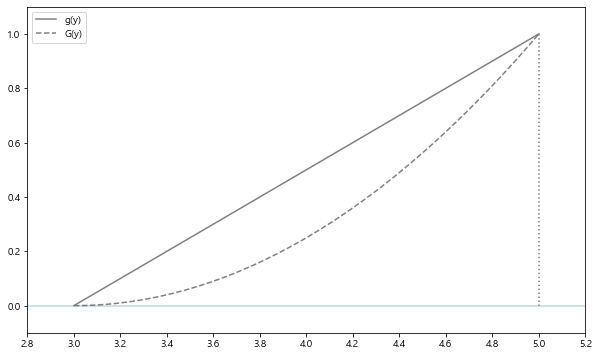

In [103]:
# 밀도함수g(y)와 분포함수 G(y)를 동시에 그려보기
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys],
        label='g(y)', color='gray')
ax.plot(ys, [G(y) for y in ys],
        label='G(y)', ls='--', color='gray')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

#### 연속형 확률분포의 기대값과 평균

In [104]:
# 183p 불공정 룰렛의 기대값 구하기
def integrand(x):
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

In [105]:
# 확률변수 변환 함수의 기대값함수 
def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [106]:
E(X)

0.667

In [107]:
#확률변수 변화의 기대값
E(X, g=lambda x: 2*x + 3)

4.333

In [108]:
# 선형성 확인
2*E(X) +3

4.333

#### 분산

In [109]:
mean  = E(X)
def integrand(x):
    return (x-mean) **2 *f(x)
integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [110]:
# 변환한 확률볌수 분산
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X,g)
    def integrand(x):
        return (g(x)-mean )** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [111]:
V(X)

0.056

In [112]:
V(X, lambda x: 2*x +3)

0.222

In [113]:
2**2*V(X)

0.222

### 1차원 연속형 확률변수의 정의
- 확률변수가 취할 수 있는 값은 구간 [a,b]로 정의되며 확률은 확률밀도함수(PDF) 또는 간단히 밀도함수라고 부르는 f(x)에 의해 정의된다.
- 밀도함수 등으로 둘러싸인 영역의 면적이 확률이 된다는 연속형 확률변수의 개념이 중요하다.


In [114]:
x_range = [0, 2]
y_range = [0, 1]

In [115]:
def f_xy(x, y):
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        return 4 * y * (x - y)
    else:
        return 0

In [116]:
XY = [x_range, y_range, f_xy]

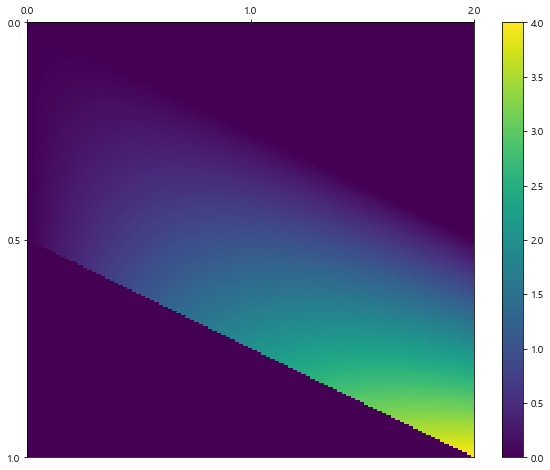

In [117]:
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x, y) for y in ys] for x in xs])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0, 200, 3), minor=False)
ax.set_yticks(np.linspace(0, 200, 3), minor=False)
ax.set_xticklabels(np.linspace(0, 2, 3))
ax.set_yticklabels(np.linspace(0, 1, 3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [118]:
# 첫 번째 인수는 피적분함수、두 번째 인수는 x의 적분구간과 y의 적분구간
integrate.nquad(f_xy,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]

1.326

## 대표적인 연속형 확률분포

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [4]:
linestyles = ['-', '--', ':']
# -무한대에서 무한대까지 확률분포함수를 적분(integrate.quad)
def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
 # 확률변수와 구간을 인수로 취하고 그 확률변수의 밀도함수와 분포함수를 그리는 함수   
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()

### 정규분포
- 통계분석에서 자주 사용되는 중요한 확률분포로 자연계에서 일어나는 수많은 현상을 표현. 가우스 분포라고도 부름
- 정규분포가 취할 수 있는 값은 실수 전체로 파라미터는 $평균(\mu)과 분산(\sigma^2)$ 두가지이다. $N(\mu,\sigma^2)$으로 표기


- 정규분포의 밀도 함수
    <img src = './image/정규분포.jpg' STYLE='width 200px;'>


- Numpy의 numpy.exp() 함수는 밑이 자연상수 e인 지수함수(e^x)로 변환
- 자연상수(natural constant) e는 2.718281828459045… 이란 숫자입니다. 파이(π)처럼 소수점 아래에 끝이 없는 무리수
- 자연 로그(natural logarithm)의 라틴 이름은 logarithm naturali 인데요, 이를 줄여서 ln이라고 합니다. 자연로그는 자연 상수 e를 밑(base)으로 하는 로그(log)입니다.
- 자연 상수 e는 어떤 대상이 얼마 만큼 성장했는지를 알려 주는 수라면, 자연로그는 그 성장을 이루기 위해 얼마의 시간(또는 기간)이 필요한 지를 계산하는 것이라고 볼 수 있습니다.
- 자연 상수 e의 의미와 자연 상수 e와 자연 로그의 관계를 이해하면, 자연 로그 값이 왜 성장을 달성하기 위한 시간(기간)을 알려 주는 지 이유를 알 수 있는데요


In [149]:
def N(mu, sigma):  #평군과 분산
    x_range = [- np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
# np.exp() 밑이 자연상수 e인 지수함수(e^x)로 변환
    return x_range, f

In [148]:
# N(2, 0.5^2)를 따르는 확률변수 X를 작성
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [123]:
check_prob(X)

expected vaue 2.000
variance 0.250


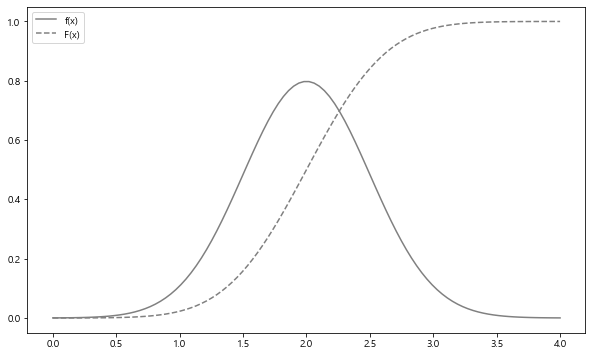

In [124]:
plot_prob(X,0,4)

In [125]:
# scipy.stats.norm은 가우시안 정규분포 객체를 생성하는  매서드
rv = stats.norm(2,0.5)

In [126]:
rv

In [127]:
rv.mean(), rv.var()

(2.000, 0.250)

In [128]:
# 2일때 대응되는 값
rv.pdf(2)

0.798

In [129]:
# 누적분포함수 1.7일대 값
rv.cdf(1.7)

0.274

In [130]:
# isf : 생존함수의 역함수(inverse survival function), 상위 30% 점
rv.isf(0.3)

2.262

In [131]:
# interval : 확률이 알파가 되는 가운데 부분의 구간을 구할 수 있다.(90% 구간)
rv.interval(0.9)

(1.178, 2.822)

In [132]:
# isf로 구하기
rv.isf(0.95), rv.isf(0.05)

(1.178, 2.822)

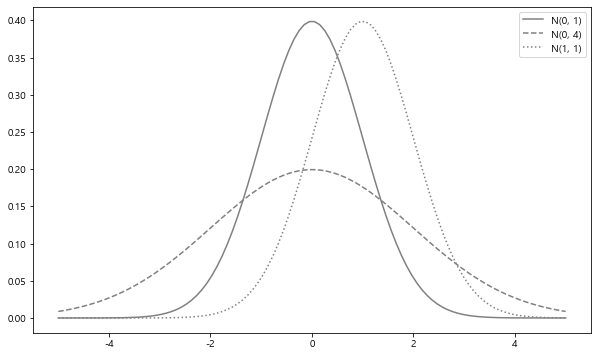

In [133]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]  # 세가지 파라미터
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()


In [134]:
stats.norm.pdf(loc=0, scale=1, x=0)

0.399

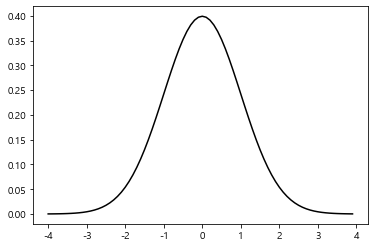

In [135]:
x_plot= np.arange(-4, 4, 0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=0, scale=1),color='black')

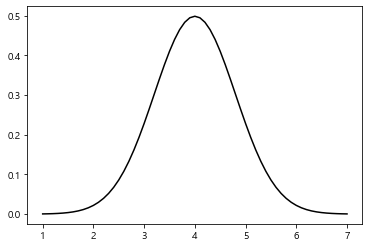

In [136]:
# x:1 ~ 7.1, 평균 4, 표준편차0.8인 정규분포 곡선을 출력하세요.
x_plot = np.arange(1, 7.1, 0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=4, scale=0.8),color='black')

In [137]:
# 확률변수가 4일때의 확률밀도
norm_dist = stats.norm(loc=4, scale=0.8)
norm_dist.pdf(x=4)

0.499

In [138]:
# 누적분포함수
stats.norm.cdf(loc=4,scale=0.8,x=7)

1.000

#### 과제_0830_2
- 상기 누적분포함수를 그래프로 출력하세요.
- 확률변수가 4일때 누적분포값(확률)
- 확률이 0.5일때 확률변수를 구하세요

확률분포함수

- pmf 확률질량함수(probability mass function)
- pdf 확률밀도함수(probability density function)
- cdf 누적분포함수(cumulative distribution function)
- ppf 누적분포함수의 역함수(inverse cumulative distribution function)
- sf 생존함수(survival function) = 1 - 누적분포함수
- isf 생존함수의 역함수(inverse survival function)
- rvs 랜덤 표본 생성(random variable sampling)
- 사이파이
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, '확률밀도함수와 누적분포함수')

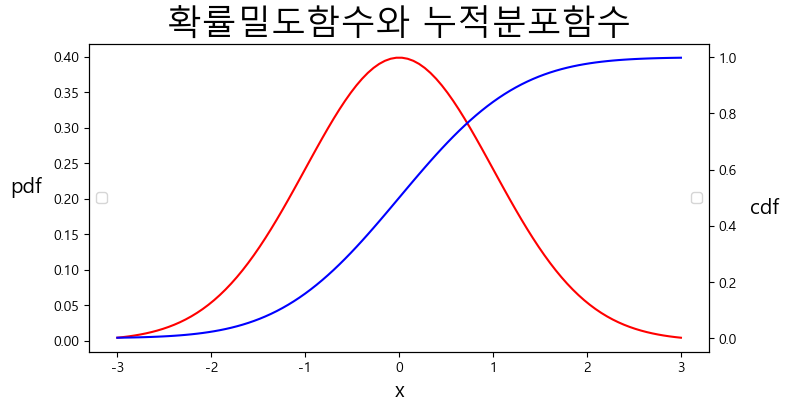

In [139]:
from matplotlib import rc
plt.style.use('default')
rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(8, 4))  
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
rv = stats.norm(0, 1)
xx = np.linspace(-3,3,100)
y1 =rv.pdf(xx)
y2 =rv.cdf(xx)
        # 플롯 사이즈 지정
ax1.plot(xx, y1, color="red")         # 선을 빨강색으로 지정하여 plot 작성  
ax2.plot(xx, y2, color='blue')
ax1.set_xlabel("x",fontsize=15)                      # x축 레이블 지정
ax1.set_ylabel("pdf",rotation=0, fontsize=15,labelpad=20) 
ax2.set_ylabel("cdf",rotation=0, fontsize=15,labelpad=20) # y축 레이블 지정
                         # 플롯에 격자 보이기
ax1.legend(loc='center left')              # 범례 표시
ax2.legend(loc='center right') 
plt.title('확률밀도함수와 누적분포함수',fontsize=25)


In [140]:
rv.cdf(0)

0.500

In [141]:
rv.cdf(1)

0.841

In [142]:
# ppf : 주거분포함수의 역함수. 누적분포가 0.5인 x값
rv.ppf(0.5)

0.000

In [143]:
rv.ppf(0.95)

1.645

In [144]:
# 0~1까지 누적확률분포
rv.cdf(1) - rv.cdf(0)

0.341

In [146]:
# (-2 < x <2) 확률을 구하세요.
rv.cdf(2) - rv.cdf(-2)

0.954

#### 과제_0830_3
- 상위 5% 확률의 확률변수를 구하세요
- 하위 5% 확률의 확률변수를 구하세요

#### 과제_0830_4
1. 어느 회사에서 종업원들의 근무기간을 조사하였는데, 종업원들의 근무기간은 평균이 11년이고 표준편차가 4년인 정규분포를 따른다고 한다. 그럼 이 회사에서 14년 이상 근무한 종업원의 비율을 구하시오 

2. 어느 전구회사의 전구의 수명은 평균 800일, 표준편차 30일인 정규분포를 따른다. 전구의 수명이 760일 이하일 확률 구하시오 

3. 어느 고등학교 3학년 학생들의 수학 성적은 평균이 70점이고 분산이 64점인 정규분포를 따른다고 한다. 그럼 점수가 80점 이상이고 90점 이하일 확률을 구하시오


### 지수분포
- 어떤 사건이 발생하는 간격이 따르는 분포이며 확률변수가 취할 수 있는 값은 0이상의 실수
- 지수분포의 파라미터는 $\lambda$로 양의 실수이며 지수분포를 Ex($\lambda$)로 표기한다.
- Ex($\lambda$)는 단위시간당 평균 $\lambda$번 발생하는 사건의 발생 간격을 따르는 확률분포이다.
- 지수분포의 밀도함수 :

$$f(x) = {\lambda}e^{{-\lambda}x} (x \ge 0)$$

                                                           0        (otherwise)


In [3]:
import numpy as np
# 파이썬 코드로 만들기
def Ex(lam):
    x_range = [0, np.inf]
    def f(x):
        if x>= 0:
            return lam* np.exp(-lam*x)
        else:
            return 0
    return x_range, f

In [68]:
lam = 2
X = Ex(lam)

In [69]:
check_prob(X)

expected vaue 0.500
variance 0.250


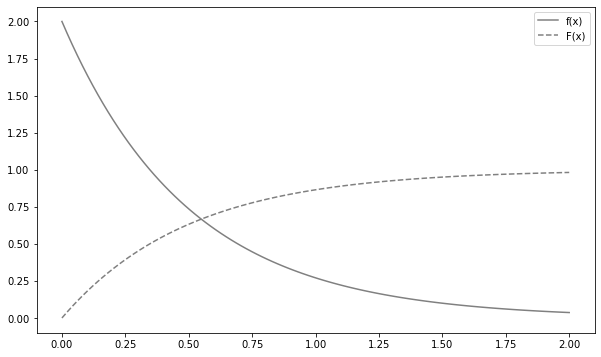

In [70]:
plot_prob(X,0,2)

#### 과제 0831_1
상기 지수분포에서 lambda를 1, 2, 3으로 변환시켰읅 때 그래프의 변화 모습을 출력하고 의미를 설명하세요

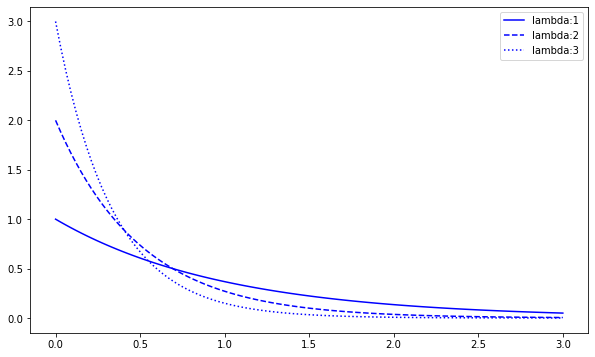

In [30]:
# lamda 1,2,3
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 3, 100)
for lam, ls in zip([1, 2, 3], linestyles):
    rv = stats.expon(scale=1/lam)
    ax.plot(xs, rv.pdf(xs), label=f'lambda:{lam}', ls=ls, color='blue')
ax.legend()

plt.show()


### 카이제곱분포
- 좌우비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어진다.
- 자유도가 커지면 좌우대칭에 가까워진다.
- 자유도의 값 가까이에 분포의 정점이 있다.


#### 과제_0831_2
p219-223 예제 코드로 작성하세요

In [34]:
n = 10
rv = stats.norm()
sample_size = int(1e6)
# 표준정규분포로부터 10×100만 사이즈로 무작위추출 (rvs 램덤(무작위)로 샘플을 뽑아줌)
# n행,sample_size열
Zs_sample = rv.rvs((n, sample_size))   
# axis=0에서 총합을 구하고, 표준정규분포의 제곱합 표본 데이터를 구한다
chi2_sample = np.sum(Zs_sample**2, axis=0)

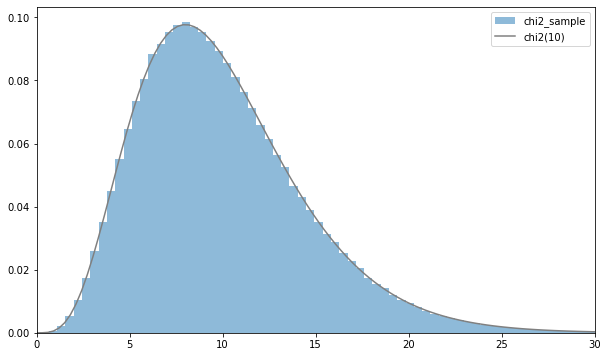

In [39]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True,
        alpha=0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray')

ax.legend()
ax.set_xlim(0, 30)
plt.show()

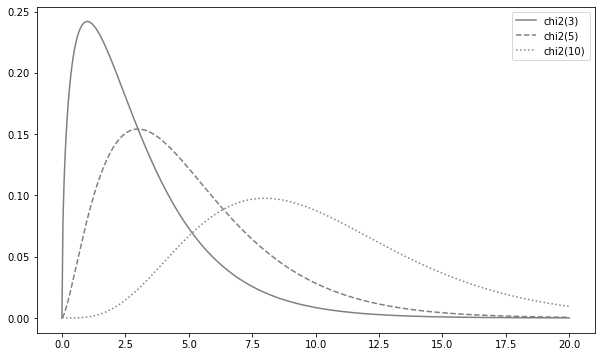

In [41]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
            label=f'chi2({n})', ls=ls, color='gray')
    
ax.legend()
plt.show()

In [43]:
# 자유도가 5인 카이제곱분포, 상위 5프로
rv = stats.chi2(5)
rv.isf(0.05)

11.070

### t분포
- 정규분포에서 모평균의 구간추정 등에 사용되는 확률분포
- 확률변수 Z, Y는 서로 독립이고 Z는 표준정규분포 N(0,1)을 Y는 자유도가 n인 카이제곱분포 $\chi^2(n)$을 각각 따를 때 t = ${Z} \over{\sqrt{{Y}\over{n}}}$ 의 확률분포를 자유도가 n인 t분포라고 한다.
- t분포의 의미
  * 모분산을 모르는 상황에서도 표본평균의 분포에 대하여 애기할 수 있다.
  * t분포를 만들 때 표본에서 계산한 표준오차로 표본평균을 표준화함
  * 표본에서 계산한 표준오차로 표본평균을 표준화했을 경우의 결과가 t분포를 따른다는 사실을 이용하면 얻어낸 표본평균에 관한 불확실성을 짐작할 수 있다.
- t분포의 특성
  * t분포는 모집단이 정규분포이더라도 분산 $\sigma^2$이 알려져 있지 않고 표본의 수가 적은 경우에 평균 $\mu$에 대한 신뢰구간 추정 및 가설검정에 아주 유용하게 쓰이는 분포이다.
  * t분포는 표준정규분포처럼 0을 중심으로 종형의 모습을 가진 대칭 분포이다.
  * t분포는 꼬리는 표준정규분포 보다 두껍다(fat tail)
  * t분포는 자유도 n에 따라 모습이 변하는데 자유도 n이 커짐에 따라 표준정규분포 N(0,1)에 수렴한다. 통상 모집단의 분산이 알려져 있지 않은 경우, 표분분포를 결정할 때 표본의 크기가 30 이하이면 t분포를, 그 크기가 30 이상이면 표준정규분포를 이용


#### 과제 0831_3
p224 ~ 228 예제 코드로 작성하세요.

In [5]:
n = 10
rv1 = stats.norm()
rv2 = stats.chi2(n)

sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample/n)

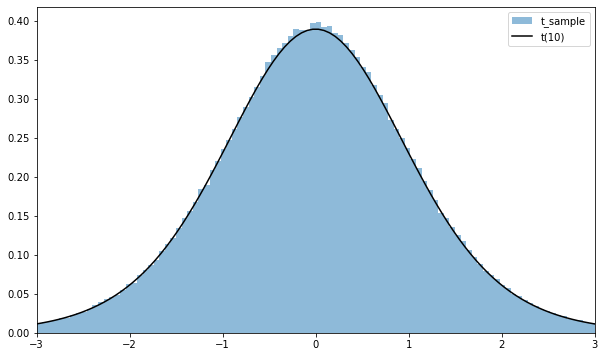

In [18]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins=100, range=(-3, 3),
        density=True, alpha=0.5, label='t_sample')   # density 두가지 그래프 중첩
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='black')

ax.legend()
ax.set_xlim(-3, 3)
plt.show()

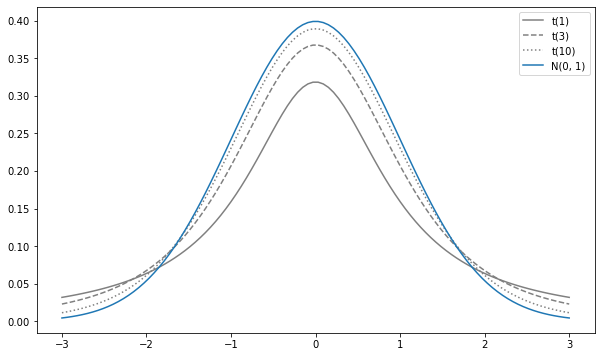

In [61]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
for n, ls in zip([1, 3, 10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs),
            label=f't({n})', ls=ls, color='gray' )
rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0, 1)')
    
ax.legend()
plt.show()

In [48]:
# 상위 5프로 t분포 값
rv = stats.t(5)
rv.isf(0.05)

2.015

### F분포
- 확률변수 $Y_1, Y_2는 서로 독립이고 각각 Y_1$ ~ ${\chi}^2(n_1), Y_2$ ~ ${{\chi}^2(n_2)}$를 따를 때,
F = ${Y_1/n_1}\over{Y_2/n_2} $의 확률분포를 자유도 $n_1,n_2$인 F분포 F$(n_1,n_2)$라고 한다.
- 좌우 비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어지는 분포이다.
- F분포가 취할 수 있는 값은 0 이상인 실수이며 분포의 정점은 1에 가깝다.


#### 과제 0831_4
p229 ~ 232 예제 코드로 작성하세요.

In [62]:
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)

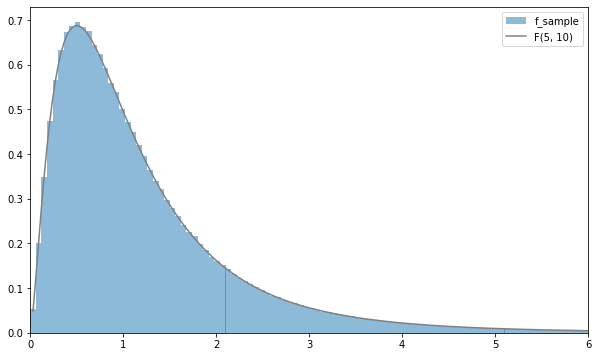

In [63]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.f(n1, n2)
xs = np.linspace(0, 6, 200)[1:]
ax.hist(f_sample, bins=100, range=(0, 6),
        density=True, alpha=0.5, label='f_sample')
ax.plot(xs, rv.pdf(xs), label=f'F({n1}, {n2})', color='gray')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

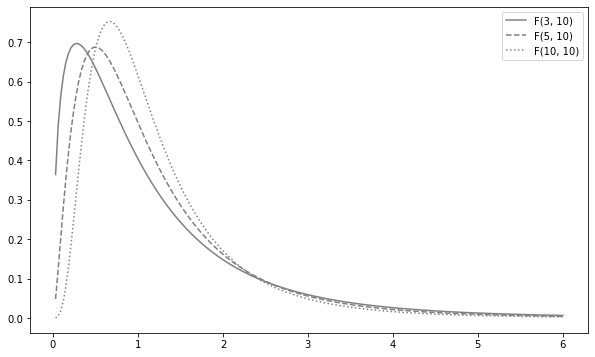

In [64]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 6, 200)[1:]
for n1, ls in zip([3, 5, 10], linestyles):
    rv = stats.f(n1, 10)
    ax.plot(xs, rv.pdf(xs),
            label=f'F({n1}, 10)', ls=ls, color='gray')
    
ax.legend()
plt.show()

## 독립동일분포
- 확률변수가 서로 독립이라는 것은 확률변수가 다른 확률변수에 영향을 끼치지 않는다는 의미이다.
- 통계분석에서 취급하는 데이터 중 상당수가 독립이면서 다차원인 확률변수의 실현값으로 간주될 수 있다.
- 서로 독립이고 각각 동일한 확률분포를 따르는 다차원 확률변수를 독립동일분포라 한다.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

In [43]:
linestyles = ['-', '--', ':', '-.']

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])


### 독립성의 정의
- 2개 이상의 확률변수가 서로 영향을 끼치지 않으며 관계가 없음을 나타내는 개념
- 2차원 확률변수 (X,Y)의 경우 다음과 같은 관계가 성립할 때 X,Y는 독립이라고 함.  
$f_{X,Y}(x,y) = f_X(x)f_Y(y)$
- 확률변수가 독립일 때 결합확률은 주변확률의 곱으로 작성할 수 있다.
- 일반화 : $f_{X_1,X_2,...,X_n}(x_1,x_2,..x_n) = f_{X_1}(x_1)f_{X_2}(x_2)···f_{X_n}(x_n)$  
※ 함수 f가 이산형이면 확률함수, 연속형이면 밀도함수를 나타냄


#### 독립성과 무상관성
- 공분산이나 상관계수가 0일 때 무상관이라 하고 두 확률변수 사이에는 상관성, 즉 선형 관계가 없음을 나타냄
- 독립성도 무상관성도 두 확률변수가 서로 관계가 없다는 것을 나타내는 성질이다.
 * 무상관성보다 독립성이 더 강한 개념
 * 2개의 확률변수 X와 Y가 독립일 때 X와 Y는 무상관이 되지만 X와 Y가 무상관일 때 X와 Y가 반드시 독립인 것은 아님


In [69]:
# 불공정 주사위 예로 사용
x_set = np.array([1, 2, 3, 4, 5, 6])
y_set = np.array([1, 2, 3, 4, 5, 6])

def f_XY(x, y):
    if x in x_set and y in y_set:
        return x * y / 441
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [70]:
# 2차원 확률변수 x와 y는 독립
# 공분산이 0이므로 무상관
Cov(XY)

-0.000

In [71]:
# 무상관인 2개의 확률변수 고려
x_set = np.array([0, 1])
y_set = np.array([-1, 0, 1])

def f_XY(x, y):
    if (x, y) in [(0, 0), (1, 1), (1, -1)]:   # 일부로 독립적이지 않케 리스트를 넣어줌
#     if (x, y) in [(0, 0), (1, 1), (1, -1),(0,-1),(0,1),(1,0)]:     
        return 1 / 6
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [72]:
Cov(XY)

0.000

In [73]:
f_X(0) * f_Y(0), f_XY(0, 0)

(0.028, 0.167)

### 합의 분포
- 서로 독립이고 동일한 확률분포을 따르는 확률변수 $X_1,X_2,···,X_n의 합 \sum_{i=1}^n X_i = X_1 + X_2 + ···+ X_n$이 따르는 확률분포를 의미
- 합의 분포를 이해하면 확률변수의 합을 n으로 나눈 표본평균의 분포도 쉽게 이해할 수 있음
- 확률변수 합의 기댓값 : $E(X_1 + X_2 + ··· + X_n) = E(X_1) + E(X_2) + ··· E(X_n)$ 이 성립
- 확률변수 합의 공식 : $X_1, X_2, ··· ,X_n이 서로 독립이면  V(X_1 + X_2 + ··· + X_n) = V(X_1) + V(X_2) + ··· V(X_n)$이 성립  
결국 합의 분포 분산도 각 확률변수에 대한 분산의 합으로 계산할 수 있다.


### 과제 0901_1
p243-250

In [51]:
# 정규분포 합의 분포
# 서로 독립인X-N(1,2), Y-N(2,3)이 있을 때 확률변수 X + Y의 분포는 N(3,5)를 따름
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
print(X_sample,'\n')
print(Y_sample,'\n')
sum_sample = X_sample + Y_sample
print('평균:', np.mean(X_sample),np.mean(Y_sample),'\n')
print('분산:', np.var(X_sample),np.var(Y_sample),'\n')
print('합의 평균, 분산:', np.mean(sum_sample), np.var(sum_sample))
np.mean(sum_sample), np.var(sum_sample)

[ 0.67   2.366  1.628 ...  0.688 -0.51   1.459] 

[-2.63   2.433 -0.893 ...  0.051  3.648  0.004] 

평균: 0.9986617043495317 2.0018287793565332 

분산: 2.0004790222691637 2.9931731057340802 

합의 평균, 분산: 3.0004904837060664 4.989750326542952


(3.000, 4.990)

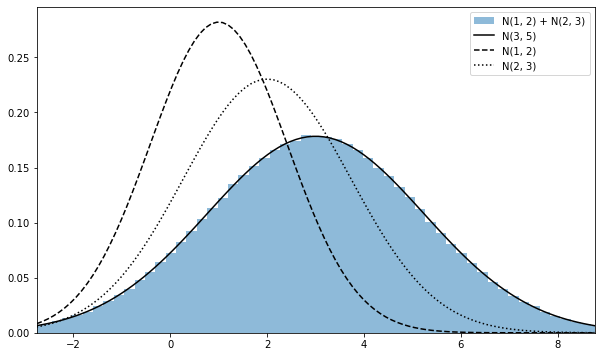

In [53]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins=100, density=True,
        alpha=0.5, label='N(1, 2) + N(2, 3)')
ax.plot(xs, rv.pdf(xs), label='N(3, 5)', color='black')
ax.plot(xs, rv1.pdf(xs), label='N(1, 2)', ls='--', color='black')
ax.plot(xs, rv2.pdf(xs), label='N(2, 3)', ls=':', color='black' )

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

In [55]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(6.994, 7.004)

C:\Users\admin\AppData\Local\Temp\ipykernel_17132\2373235291.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, _ = np.histogram(sum_sample, bins=20,


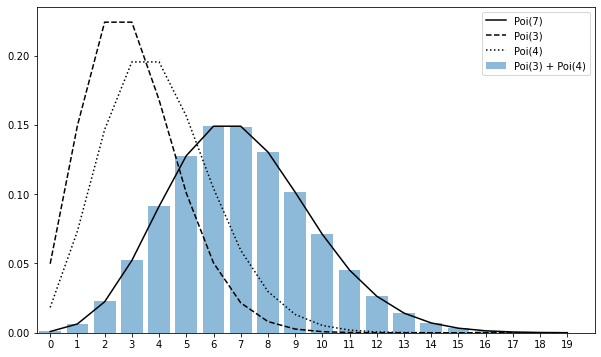

In [59]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist, _ = np.histogram(sum_sample, bins=20,
                       range=(0, 20), normed=True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
ax.plot(xs, rv.pmf(xs), label='Poi(7)',  color='black')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='black')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':',  color='black')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()

In [74]:
# 베르누이 분포의 합의 분포
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

np.mean(sum_sample), np.var(sum_sample)

(2.998, 2.098)

C:\Users\admin\AppData\Local\Temp\ipykernel_17132\1046910713.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, _ = np.histogram(sum_sample, bins=10,


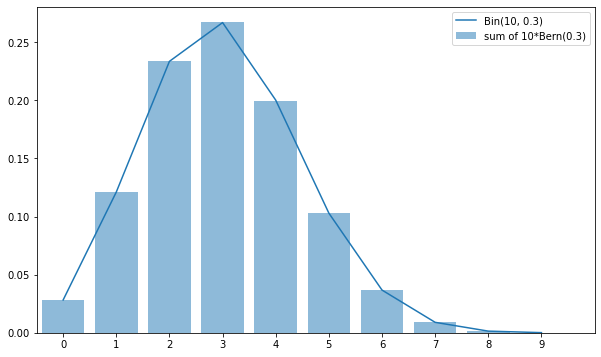

In [75]:
# 베르누이는 재생성이 없다. 합의분포는 따른다, n(횟수)이 많을수록 이항분포모양과 가까워진다. 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.binom(10, p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins=10,
                       range=(0, 10), normed=True)
ax.bar(xs, hist, alpha=0.5, label='sum of 10*Bern(0.3)')
ax.plot(xs, rv.pmf(xs), label='Bin(10, 0.3)')
ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
plt.show()

#### 과제 0901_2
p251-260

## 표본평균의 분포
- 표본평균의 분포란 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1, X_2, ...,X_n$의 표본평균이 따르는 분포
- 이 분포는 중심극한정리나 대수의 법칙 등 추측통계에서 중요한 성질을 담고 있기 때문에 유의해야 함
- 표본평균의 기댓값과 분산  
$E(\bar{X}) = \mu$  
$V(\bar{X}) = {\sigma}^2 / n$


In [76]:
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(1.000, 0.199)

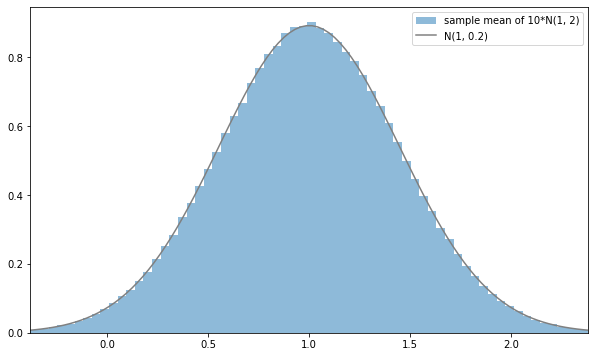

In [77]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)
ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10*N(1, 2)')
ax.plot(xs, rv_true.pdf(xs), label='N(1, 0.2)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

In [81]:
# 포아송 분포의 표본평균 분포
l = 3
rv = stats.poisson(l)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(2.999, 0.300)

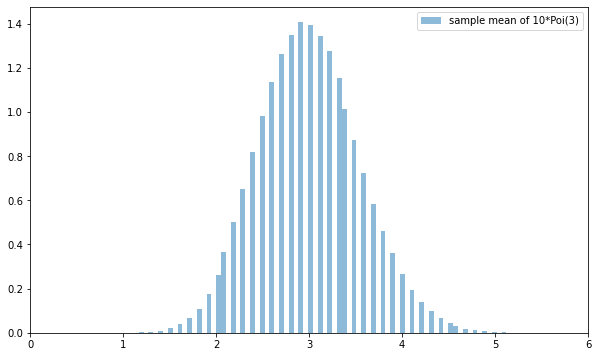

In [82]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10*Poi(3)')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

### 중심극한정리
- 확률변수 $X_1,X_2,...Xn$이 서로 독립이고 기댓값이 $\mu, 분산이 {\sigma}^2$인 확률분포 F를 따를 때 n이 커짐에 따라 표본평균 $\bar{X}의 분포는 정규분포 N(\mu,{\sigma}^2/n)$에 가까워진다.


In [86]:
# 원래 분포가 뭐였든 간에 표본평균의 분포는 정규분포에 가까워진다.
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

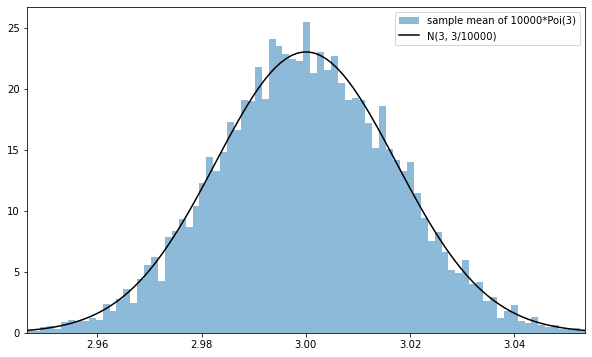

In [85]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10000*Poi(3)')
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='black')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

### 대수의 법칙
확률변수 $X_1,X_2,...,X_n$이 서로 독립이고 평균이 $\mu, 분산이 \sigma^2$일 것 같은 확률분포를 따를 때 n이 커짐에 따라 표본평균은 $\mu$에 수렴한다.


In [87]:
p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n, 4))
space = np.linspace(100, n, 50).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis=0)
                      for sp in space]).T

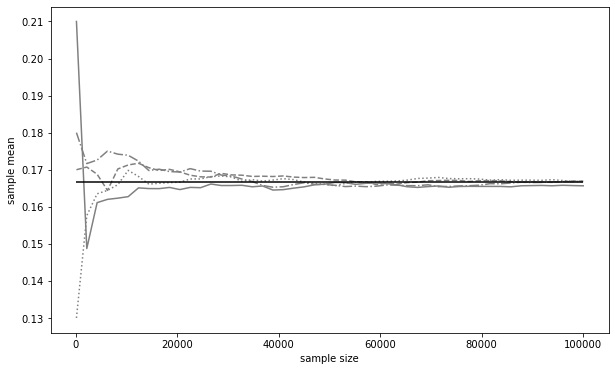

In [88]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')
ax.hlines(p, -1, n, 'k')
ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show()

#### 과제 0901_3
중심극한정리와 대수의 법칙을 사례를 들어 설명하세요.

In [6]:
import numpy as np
#  확률이 100분에 1 인 기하분포 (기하분포로부터 무작위 표본( n )추출 10000*10000번 수행)
p=1/100
rv = stats.geom(p)

n=10000
sample_size = 10000
Xs_sample=rv.rvs((n, sample_size))    # 10000번을 뽑아서 10000번의 평균?
sample_mean = np.mean(Xs_sample,axis=0) # 표본의 평균 뽑기

# 기하분포의 평균과 표준편차 정규분포 만들기
rv_true = stats.norm(1/p,np.sqrt(((1-p)/p**2)/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

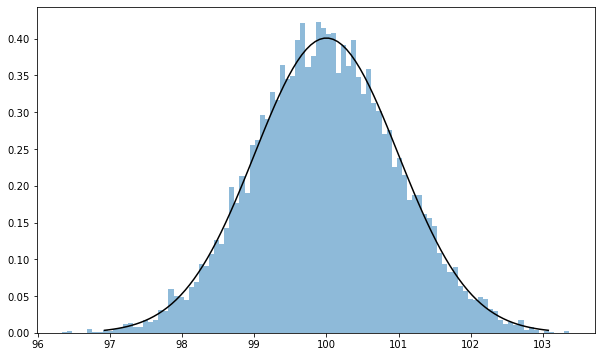

In [7]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True, alpha=0.5)
ax.plot(xs, rv_true.pdf(xs), color='black')

plt.show()

- 대수의 법칙 -
 표본 크기가 커지면 평균이 모평균에 수렴

In [77]:
%precision 3

'%.3f'

In [8]:
import random
data=np.random.randint(1000,size=10000)
mean = np.mean(data)
var= np.var(data)
print(f'평균:{mean}')
print(f'분산:{var}')

평균:505.6728
분산:83302.08654015999


In [9]:
data=list(data)

In [18]:
sample_100 = random.sample(data,100)
sample_500= random.sample(data,500)
sample_1000= random.sample(data,1000)
sample_5000= random.sample(data,5000)
sample_8000= random.sample(data,8000)


In [19]:
def mv(x):
    return print(abs(np.mean(x)-mean), abs(np.var(x)-var))

In [22]:
mv(sample_100)
mv(sample_500)
mv(sample_1000)
mv(sample_5000)
mv(sample_8000)

39.80720000000002 9910.443059839978
16.605200000000025 6024.470175840019
2.4728000000000065 2432.517459840019
1.406000000000006 304.2584504000115
0.627049999999997 143.05286677752156
